In [1]:
#we will look into the two metrices that will be used in decision_trees

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Gini Impurity

#### For a dataset having k labels, and labels from class k takes up fk feaction of the dataset, then gini impurity is given by - 
#### gini_impurity = 1 - sum(fk**2 for all k)
#### The lower, the better

In [4]:
pos_fraction = np.linspace(0,1,1000)

Text(0, 0.5, 'Gini Impurity')

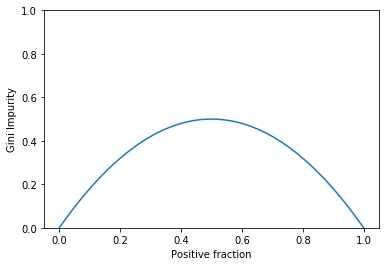

In [8]:
##ploting gini impurity versus 
gini_impurity = 1 - pos_fraction**2 - (1 - pos_fraction)**2 #since there are only two classes, one positive, and other negative
plt.plot(pos_fraction,gini_impurity)
plt.ylim(0,1)
plt.xlabel('Positive fraction')
plt.ylabel('Gini Impurity')

In [13]:
def Gini_impurity(labels):
    #when the set is empty it is pure
    if not labels:
        return 0
    counts = np.unique(labels,return_counts=True)[1]
    fractions = counts / float(len(labels))
    return 1 - np.sum(fractions**2)
    

In [16]:
print(Gini_impurity([1,1,1,1,1,]))
print(Gini_impurity([1,1,1,1,0,0,0,0]))
print(Gini_impurity([1,1,1,1,0]))
print(Gini_impurity([1,0,0,0,0]))


0.0
0.5
0.31999999999999984
0.31999999999999984


In [17]:
#in case of splitting, we coose the split after which the gini impurity is minimum

## Entropy and Information Gain

#### For a dataset having k labels, and labels from class k takes up fk feaction of the dataset, then entropy is given by - 
#### entropy = - sum(fk*log(fk))

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log2
  
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


Text(0, 0.5, 'Entropy')

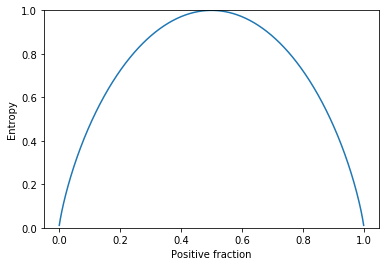

In [21]:
##ploting gini impurity versus 
entropy =  -( pos_fraction*np.log2(pos_fraction) + (1 - pos_fraction)*(np.log2(1 - pos_fraction)) ) 
#since there are only two classes, one positive, and other negative
plt.plot(pos_fraction,entropy)
plt.ylim(0,1)
plt.xlabel('Positive fraction')
plt.ylabel('Entropy')

In [23]:
def entropy(labels):
    if not labels:
        return 0
    fractions = np.unique(labels,return_counts=True)[1] / float(len(labels))
    return -1*np.sum(fractions*np.log2(fractions))

In [24]:
print(entropy([1,1,1,1,1,]))
print(entropy([1,1,1,1,0,0,0,0]))
print(entropy([1,1,1,1,0]))
print(entropy([1,0,0,0,0]))


-0.0
1.0
0.7219280948873623
0.7219280948873623


### Information gain

#### Informtiion_gain = Entropy(before) - Entropy(after
#### We will select the feature, which has maximum information split after spliiting 

In [25]:
# We can choose either of the two metrics, they both have almost equal effect

In [28]:
criterion_function = { 'gini':gini_impurity,
                     'entropy':entropy}

def weighted_impurity(groups,criterion = 'gini'):
    """
    Args - 
      groupts - (list of list) decribing the child class
      criterion - string('entropy' or 'criterion')
    Returns - 
       weighted_impurity - float
    """
    total_sum = sum(len(group) for group in groups)
    weighted_sum = 0.0
    for group in groups:
        weighted_sum += (len(group) / total_sum)*criterion_function[criterion](group)
    return weighted_sum    

In [29]:
children_1 = [[1, 0, 1], [0, 1]]
children_2 = [[1, 1], [0, 0, 1]]
print('Entropy of #1 split: {0:.4f}'.format(weighted_impurity(children_1, 'entropy')))
print('Entropy of #2 split: {0:.4f}'.format(weighted_impurity(children_2, 'entropy')))

Entropy of #1 split: 0.9510
Entropy of #2 split: 0.5510
